<a href="https://colab.research.google.com/github/xghan99/dsa4212-assignments/blob/main/NN_scratch_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas
import pickle
with open(r"df_sample.pkl", "rb") as input_file:
  df_sample = pickle.load(input_file)
with open(r"idx_2_word.pkl", "rb") as input_file:
  idx_2_word = pickle.load(input_file)
with open(r"word_2_idx.pkl", "rb") as input_file:
  word_2_idx = pickle.load(input_file)

In [ ]:
import jax
import jax.numpy as jnp
import numpy as np
#Build training dataset
train = np.concatenate(df_sample['training_data'])
 

In [ ]:
#Initializing Variables
W_input_init = jnp.array(np.random.normal(0,0.01,(len(idx_2_word),100)))
W_output_init = jnp.array(np.random.normal(0,0.01,(100,len(idx_2_word))))

In [ ]:
#Loss Functions (Cross Entropy)
@jax.jit
def loss_single(W_input, W_output,x,y):
  hidden = W_input[x].reshape(1,100)
  output = hidden@W_output
  softmax_output = jax.nn.softmax(output,axis = 1).reshape(len(idx_2_word))
  return -jnp.log(softmax_output)[y]
loss_batch = jax.vmap(loss_single, in_axes = (None, None, 0, 0))
@jax.jit
def total_loss(W_input, W_output,x,y):
  return jnp.mean(loss_batch(W_input, W_output,x,y))

In [ ]:
vg_input = jax.jit(jax.value_and_grad(total_loss, argnums = 0))
vg_output = jax.jit(jax.value_and_grad(total_loss, argnums = 1))

In [ ]:
#Shuffle
np.random.shuffle(train)

In [ ]:
#Create small training batch for computing training loss
X_train_batch, y_train_batch = jnp.array(train[0:512,0],dtype = 'int32'), jnp.array(train[0:512,1],dtype = 'int32')

In [ ]:
from tqdm import tqdm
W_input = W_input_init.copy()
W_output = W_output_init.copy()
niter = 30
tr_loss_traj = []
batch_size = 4096
count = 0
eta = 1
for epoch in range(niter):
  #Shuffle
  np.random.shuffle(train)
  #Annealing Learning Rate
  '''
  if epoch%6 == 0 and epoch!=0:
    eta = 0.5*eta
    print(eta)
  '''
  tr_loss, _ = vg_input(W_input,W_output,X_train_batch,y_train_batch)
  print(tr_loss)
  #Split into batches
  loss_traj_sub = []
  batches = jnp.arange((train.shape[0]//batch_size)+1) ### Batch Indices
  for batch in tqdm(batches):
      if batch != batches[-1]:
          start, end = int(batch*batch_size), int(batch*batch_size+batch_size)
      else:
          start, end = int(batch*batch_size), None
      X_train, y_train = jnp.array(train[start:end,0],dtype = 'int32'), jnp.array(train[start:end,1],dtype = 'int32')
      v_i, g_i = vg_input(W_input,W_output,X_train,y_train)
      v_o, g_o = vg_output(W_input,W_output,X_train,y_train)
      tr_loss_traj.append(v_i)
      if count == 0:
        W_input = W_input - eta*g_i
        W_output = W_output - eta*g_o
        change_i = -eta*g_i
        change_o = -eta*g_o
      else:
        W_input = W_input - eta*g_i + 0.9*change_i
        W_output = W_output - eta*g_o + 0.9*change_o
        change_i = - eta*g_i + 0.9*change_i
        change_o = - eta*g_o + 0.9*change_o
      count+=1
  #Computed Loss
  



9.047826


100%|██████████| 649/649 [00:11<00:00, 54.20it/s]


7.2457347


100%|██████████| 649/649 [00:12<00:00, 54.01it/s]


6.9685717


100%|██████████| 649/649 [00:12<00:00, 53.29it/s]


6.892425


100%|██████████| 649/649 [00:12<00:00, 53.04it/s]


6.872363


100%|██████████| 649/649 [00:12<00:00, 53.31it/s]


6.825525


100%|██████████| 649/649 [00:12<00:00, 53.49it/s]


6.80972


100%|██████████| 649/649 [00:12<00:00, 53.48it/s]


6.782154


100%|██████████| 649/649 [00:12<00:00, 53.30it/s]


6.7601485


100%|██████████| 649/649 [00:12<00:00, 53.40it/s]


6.7343974


100%|██████████| 649/649 [00:12<00:00, 53.31it/s]


6.726271


100%|██████████| 649/649 [00:12<00:00, 53.53it/s]


6.704608


100%|██████████| 649/649 [00:12<00:00, 53.57it/s]


6.6774945


100%|██████████| 649/649 [00:12<00:00, 53.39it/s]


6.6573725


100%|██████████| 649/649 [00:12<00:00, 53.33it/s]


6.62789


100%|██████████| 649/649 [00:12<00:00, 53.22it/s]


6.6189857


100%|██████████| 649/649 [00:12<00:00, 53.45it/s]


6.6107


100%|██████████| 649/649 [00:12<00:00, 53.35it/s]


6.5856557


100%|██████████| 649/649 [00:12<00:00, 53.39it/s]


6.5662446


100%|██████████| 649/649 [00:12<00:00, 53.27it/s]


6.5526724


100%|██████████| 649/649 [00:12<00:00, 53.36it/s]


6.54828


100%|██████████| 649/649 [00:12<00:00, 53.56it/s]


6.533563


100%|██████████| 649/649 [00:12<00:00, 53.28it/s]


6.515479


100%|██████████| 649/649 [00:12<00:00, 53.14it/s]


6.5148993


100%|██████████| 649/649 [00:12<00:00, 53.26it/s]


6.4934826


100%|██████████| 649/649 [00:12<00:00, 53.42it/s]


6.4795866


100%|██████████| 649/649 [00:12<00:00, 53.19it/s]


6.4832096


100%|██████████| 649/649 [00:12<00:00, 53.13it/s]


6.4792995


100%|██████████| 649/649 [00:12<00:00, 53.15it/s]


6.468093


100%|██████████| 649/649 [00:12<00:00, 53.21it/s]


6.451922


100%|██████████| 649/649 [00:12<00:00, 53.43it/s]


In [ ]:
train.shape[0]/4096

707.59521484375

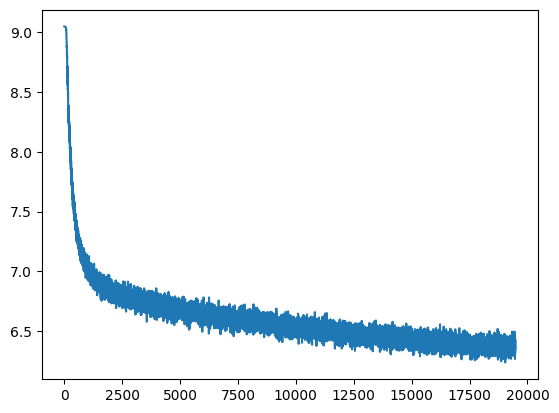

In [ ]:
import pylab as plt
plt.plot(tr_loss_traj)

In [ ]:
W_input_init

Array([[-0.00507089, -0.0083379 ,  0.00299736, ...,  0.00143476,
        -0.01333504, -0.0019146 ],
       [ 0.00279097,  0.00108768, -0.00614054, ..., -0.00070675,
         0.00664413,  0.00765096],
       [ 0.00253074, -0.00931743, -0.01287345, ...,  0.00158463,
        -0.01113979,  0.0131964 ],
       ...,
       [ 0.01241543, -0.00047243, -0.01418059, ..., -0.00314069,
        -0.00695634, -0.02354393],
       [-0.01994094, -0.00137882, -0.00243809, ...,  0.00779493,
         0.00290231,  0.00960307],
       [ 0.00181615,  0.00121806, -0.00784372, ..., -0.00141557,
         0.00939678,  0.01484289]], dtype=float32)

In [ ]:
#Word Embeddings
W_input

Array([[ 0.29030254, -0.31464103, -0.35322136, ..., -0.1402781 ,
        -0.5501769 , -0.1984388 ],
       [ 0.21042702,  0.07391097, -0.6370893 , ...,  0.13262449,
         0.58602345,  0.3923241 ],
       [ 0.206657  , -0.18307061, -0.1138256 , ..., -0.0456132 ,
        -0.39776984,  0.6742934 ],
       ...,
       [-0.00437442, -0.02412188, -0.21124819, ..., -0.10853051,
        -0.0743931 , -0.04663879],
       [-0.10186025, -0.22990985, -0.11063803, ...,  0.08316323,
        -0.16050287,  0.13527282],
       [-0.08992184, -0.13100848,  0.02322912, ..., -0.07769077,
        -0.11354681,  0.36224583]], dtype=float32)